# Regularizing a Decision Tree Lab

### Intro and objectives


### In this lab you will learn:
1. a basic example of decision tree regularization

### What I hope you'll get out of this lab
* Worked Examples
* How to interpret the results obtained

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

### In this lab we will learn how to avoid overfitting by restricting the freedom of the decision tree to adapt completely to the training data.

## Let's create some synthetic data

In [6]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

In [9]:
X_moons[0:5]

array([[-1.10598226, -0.25656957],
       [ 0.56410443,  0.84068113],
       [ 1.20954578, -0.55310671],
       [ 0.10838923,  0.60461951],
       [ 0.05232441,  0.52046138]])

In [10]:
y_moons[0:5]

array([0, 0, 1, 1, 1])

## Let's train two decision tree classifiers. The first one with no restrictions the second one with some level of regularization


In [12]:
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

## Let's visualize the boundaries of the decision tree

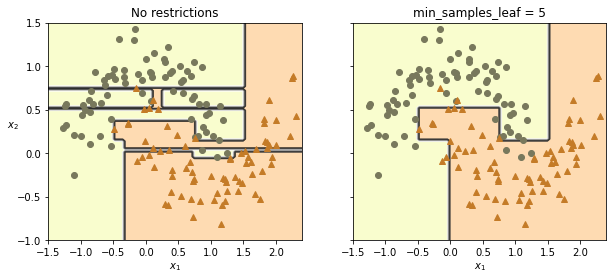

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# extra code – this cell generates and saves Figure 6–3

def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")

plt.show()

#### The unregularized model on the left is clearly overfitting, and the regularized model on the right will probably generalize better.

## Let's evaluate the performance of each classifier

In [15]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2,
                                        random_state=43)


In [16]:
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [17]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

#### From the previous results we conclude that the regularized decision treee classifier performs better (larger accuracy on the test set)